In [44]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = '.'

In [2]:
df = pd.read_csv('datasets\\raw\\housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

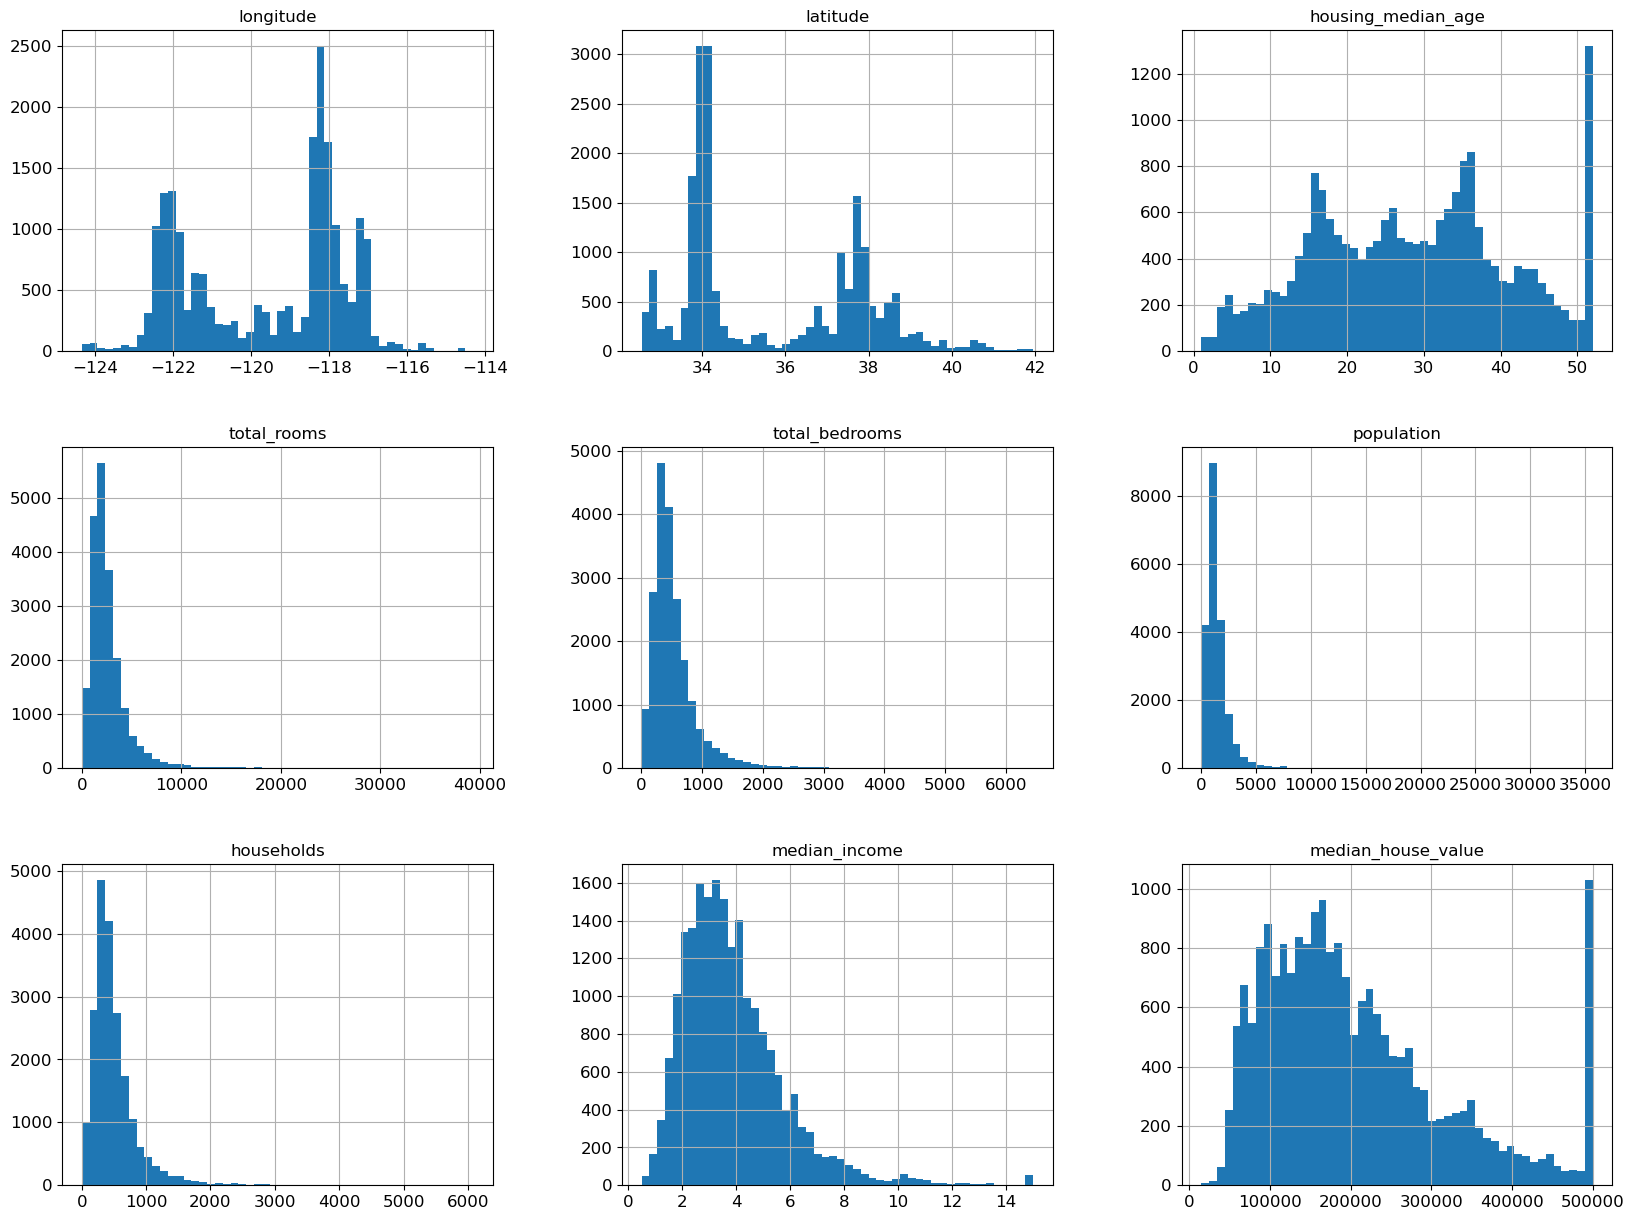

In [9]:
df.hist(bins=50, figsize=(20,15));

### Create a Test set

In [13]:
np.random.seed(41)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set, test_set = split_train_test(df, 0.2)
len(train_set), len(test_set)

(16512, 4128)

### Using train-test split

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=41)

len(train_set), len(test_set)

(16512, 4128)

<Axes: >

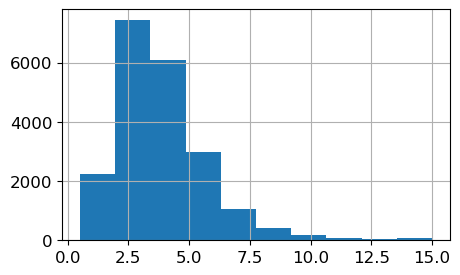

In [19]:
plt.figure(figsize=(5,3))
df["median_income"].hist()

In [30]:
df["income_cat"] = pd.cut(df["median_income"],
                          bins=[0.,
                                df['median_income'].quantile(0.25),
                                df['median_income'].quantile(0.50),
                                df['median_income'].quantile(0.75),
                                df['median_income'].quantile(0.95),
                                np.inf],
                          labels=[1, 2, 3, 4, 5])

df['income_cat'].value_counts(normalize=True)

income_cat
1    0.25
2    0.25
3    0.25
4    0.20
5    0.05
Name: proportion, dtype: float64

<Axes: >

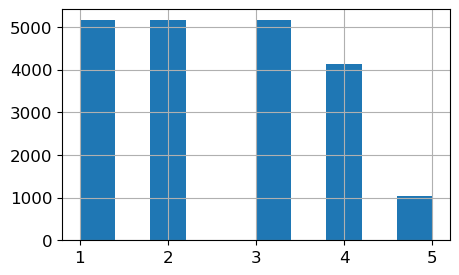

In [31]:
plt.figure(figsize=(5,3))
df['income_cat'].hist()

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [33]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5612,-118.27,33.79,39.0,1417.0,359.0,1450.0,367.0,2.8462,172000.0,<1H OCEAN,2
1174,-121.65,39.53,23.0,1387.0,325.0,640.0,289.0,1.4833,65200.0,INLAND,1
16983,-122.29,37.56,36.0,805.0,140.0,445.0,139.0,5.8221,289400.0,NEAR BAY,4
12262,-116.95,33.78,24.0,3409.0,804.0,1939.0,739.0,1.7303,74000.0,INLAND,1
2223,-119.82,36.82,28.0,2268.0,336.0,752.0,330.0,5.2809,151500.0,INLAND,4


In [35]:
strat_train_set['income_cat'].value_counts(normalize=True)

income_cat
1    0.250000
2    0.250000
3    0.250000
4    0.199976
5    0.050024
Name: proportion, dtype: float64

In [36]:
strat_test_set['income_cat'].value_counts(normalize=True)

income_cat
1    0.250000
2    0.250000
3    0.250000
4    0.200097
5    0.049903
Name: proportion, dtype: float64

In [37]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error
income_cat,,,,
1,0.25,0.250000,0.254360,1.744186
2,0.25,0.250000,0.255814,2.325581
3,0.25,0.250000,0.254603,1.841085
4,0.20,0.200097,0.186773,-6.613372
5,0.05,0.049903,0.048450,-3.100775


In [38]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [39]:
housing = strat_train_set.copy()

### Visualizations

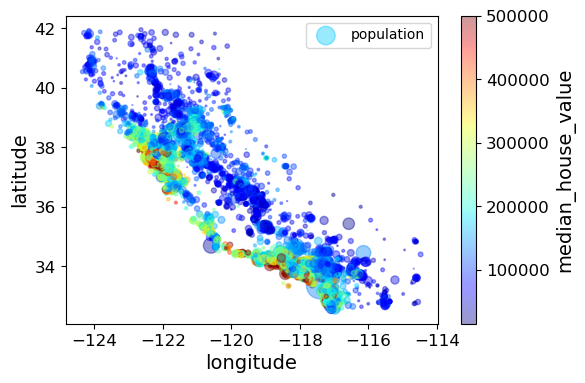

In [48]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(6,4),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [45]:
import os
import urllib

# Download the California map image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x28e996c45d0>)

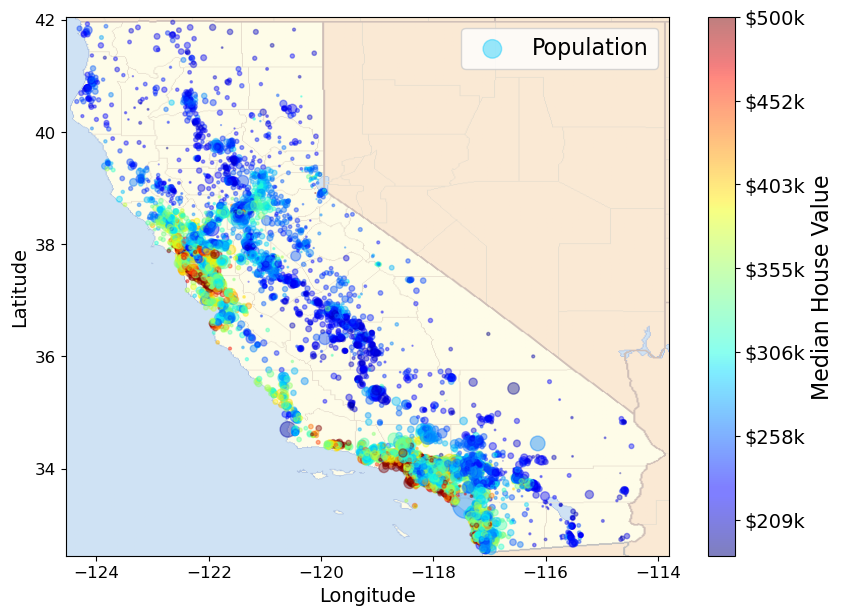

In [53]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# This is for the color bar
# In the code above, in ax, set colorbar=True to visualize
# the difference the default colorbar and customized colorbar
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

### Correlations

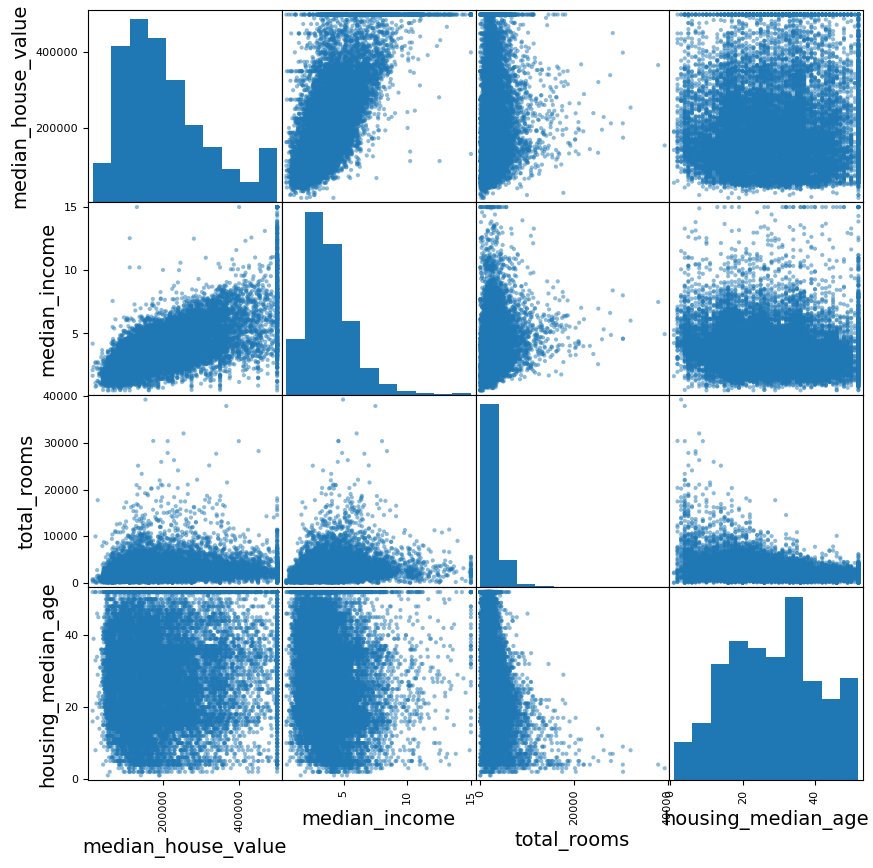

In [57]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(10, 10));

In [59]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.drop('ocean_proximity',axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688893
rooms_per_household         0.148674
total_rooms                 0.138996
housing_median_age          0.105066
households                  0.072546
total_bedrooms              0.055123
population                 -0.018257
population_per_household   -0.021850
longitude                  -0.047759
latitude                   -0.142666
bedrooms_per_room          -0.255697
Name: median_house_value, dtype: float64

### Preprocess data for machine learning

In [61]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Fill missing values using imputer

#### Numerical columns

In [64]:
housing[housing.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7168,-118.17,34.06,43.0,464.0,NaN,416.0,120.0,2.4750,<1H OCEAN
4600,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,<1H OCEAN
4046,-118.49,34.13,24.0,4394.0,NaN,1443.0,528.0,11.2979,<1H OCEAN
6298,-117.91,34.02,22.0,6269.0,NaN,5587.0,1251.0,3.8201,<1H OCEAN
6253,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN


In [68]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [69]:
housing_tr[housing_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


#### Categorical columns

In [70]:
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[["ocean_proximity"]]

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [1.],
       [3.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [71]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [72]:
np.c_([1,2,3],[2,3,4])

TypeError: 'CClass' object is not callable

In [73]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
5612,-118.27,33.79,39.0,1417.0,359.0,1450.0,367.0,2.8462,<1H OCEAN,3.861035,3.950954
1174,-121.65,39.53,23.0,1387.0,325.0,640.0,289.0,1.4833,INLAND,4.799308,2.214533
16983,-122.29,37.56,36.0,805.0,140.0,445.0,139.0,5.8221,NEAR BAY,5.791367,3.201439
12262,-116.95,33.78,24.0,3409.0,804.0,1939.0,739.0,1.7303,INLAND,4.612991,2.623816
2223,-119.82,36.82,28.0,2268.0,336.0,752.0,330.0,5.2809,INLAND,6.872727,2.278788


### Transformation pipeline

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [78]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

### Train a model

In [79]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [80]:
# sample
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [185352.16570208  42133.03565593 308998.51501062  81787.46120212
 210407.27979973]


In [81]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68327.01132911486

In [82]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Cross validation

In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [87]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [67285.24902857 69008.83897949 70771.02490687 68819.81528022
 68616.32237026 71050.47610839 71942.09263086 68516.37295987
 66424.08133727 71515.5472606 ]
Mean: 69394.98208624139
Standard deviation: 1753.68572513681


In [88]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67920.02008183 71944.0871343  72334.19685566 65630.43941182
 66099.27242283 70076.57083331 66927.2020896  69348.19242214
 68379.42319599 67976.66813414]
Mean: 68663.60725816288
Standard deviation: 2158.622018644394


In [89]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [90]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18502.522630451713

In [91]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49531.94238392 51083.64765938 51997.77372963 48295.471378
 48679.79394173 53147.22832385 48573.75947503 50492.04839855
 48649.31759689 48433.86523065]
Mean: 49888.484811762784
Standard deviation: 1623.7892842894364


### Fine Tuning Hyper Parameters

#### Grid Search

In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# dec_tree = DecisionTreeRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [94]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [95]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64396.323694698745 {'max_features': 2, 'n_estimators': 3}
55399.53108521383 {'max_features': 2, 'n_estimators': 10}
52737.70103732378 {'max_features': 2, 'n_estimators': 30}
58853.189221119894 {'max_features': 4, 'n_estimators': 3}
52055.14078605709 {'max_features': 4, 'n_estimators': 10}
49813.96021378094 {'max_features': 4, 'n_estimators': 30}
57989.320069476846 {'max_features': 6, 'n_estimators': 3}
51676.27767017811 {'max_features': 6, 'n_estimators': 10}
49975.75532683591 {'max_features': 6, 'n_estimators': 30}
58078.815439743776 {'max_features': 8, 'n_estimators': 3}
51672.734087161676 {'max_features': 8, 'n_estimators': 10}
49679.6692182906 {'max_features': 8, 'n_estimators': 30}
62519.75176872599 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53958.949066181114 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58805.396919124876 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52531.170958582 {'bootstrap': False, 'max_features': 3, 'n_estimators'

#### Random Search

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=50),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028EA1286310>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000028EA3D91D90>},
                   random_state=42, scoring='neg_mean_squared_error')

In [98]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50138.50463134088 {'max_features': 7, 'n_estimators': 29}
49533.26306381601 {'max_features': 7, 'n_estimators': 43}
50609.997097874024 {'max_features': 5, 'n_estimators': 21}
50681.99120053551 {'max_features': 7, 'n_estimators': 19}
52066.43382050607 {'max_features': 7, 'n_estimators': 11}
51526.509339045384 {'max_features': 3, 'n_estimators': 24}
50116.63881800229 {'max_features': 5, 'n_estimators': 36}
51713.86373791353 {'max_features': 3, 'n_estimators': 22}
64646.27013049068 {'max_features': 5, 'n_estimators': 2}
49813.96021378094 {'max_features': 4, 'n_estimators': 30}


In [97]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3759538519344242, 'median_income'),
 (0.16130411043911072, 'INLAND'),
 (0.10765302215870974, 'pop_per_hhold'),
 (0.07367331960539665, 'longitude'),
 (0.06255493550017416, 'latitude'),
 (0.05494291010350804, 'rooms_per_hhold'),
 (0.048931216100586504, 'bedrooms_per_room'),
 (0.04337152210899061, 'housing_median_age'),
 (0.014802496011724698, 'total_rooms'),
 (0.014701548002393114, 'total_bedrooms'),
 (0.014592160254820666, 'population'),
 (0.013728371550348901, 'households'),
 (0.0075901473094686835, '<1H OCEAN'),
 (0.0040610565567157034, 'NEAR OCEAN'),
 (0.0019369001987377822, 'NEAR BAY'),
 (0.0002024321648898886, 'ISLAND')]

### Evaluation on Test Set

In [103]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49808.984934041364

### Complete Pipeline

In [105]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("forest", RandomForestRegressor(**grid_search.best_params_))
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([167896.66666667,  64103.33333333, 278870.        ,  80026.66666667,
       168446.66666667])

### Save model using joblib

In [ ]:
import joblib

# To save
joblib.dump(full_pipeline_with_predictor, "my_model.pkl")

# To load
my_model = joblib.load("my_model.pkl")